Acceptance Rate: 0.798


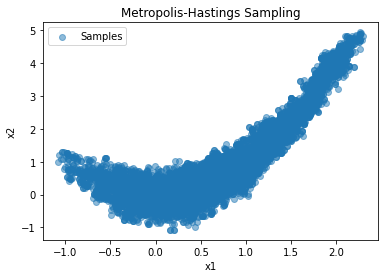

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Rosenbrock density
def rosenbrock_density(x1, x2):
    return np.exp(-(1 - x1)**2 - 100 * (x2 - x1**2)**2 / 20)

# Define the target function
def target_function(x1, x2):
    return 1 / (1 + np.exp(- (x1 + x2)))

# Define the proposal distribution (Gaussian)
def gaussian_proposal(x, sigma=0.1):
    return np.random.normal(x, sigma, size=len(x))

# Metropolis-Hastings algorithm
def metropolis_hastings(num_samples):
    samples = []
    current_sample = np.array([0.0, 0.0])  # Initial sample
    acceptance_count = 0

    for _ in range(num_samples):
        # Propose a new sample
        proposed_sample = gaussian_proposal(current_sample)

        # Calculate acceptance probability
        acceptance_prob = min(1, rosenbrock_density(*proposed_sample) / rosenbrock_density(*current_sample))

        # Accept or reject the proposal
        if np.random.rand() < acceptance_prob:
            current_sample = proposed_sample
            acceptance_count += 1

        samples.append(current_sample)

    acceptance_rate = acceptance_count / num_samples
    print(f"Acceptance Rate: {acceptance_rate}")

    return np.array(samples)

# Number of samples
num_samples = 10000

# Generate samples using Metropolis-Hastings
samples = metropolis_hastings(num_samples)

# Plot the samples
plt.scatter(samples[:, 0], samples[:, 1], alpha=0.5, label="Samples")
plt.title("Metropolis-Hastings Sampling")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

In [3]:
# Function to compute f(x1, x2)
def f(x1, x2):
    return 1 / (1 + np.exp(- (x1 + x2)))

# Compute the approximation of s
approximation_s = np.mean(f(samples[:, 0], samples[:, 1]))

print(f"Approximation of s: {approximation_s}")


Approximation of s: 0.7329463185712066
